In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pylab as plt

In [2]:
df=pd.read_csv('DATA_2.csv',index_col=None, engine='c') # import data
print('original datasize:', df.shape)
df.dropna(inplace=True)
print('adjusted datasize:', df.shape)
print('features: ', df.columns)
df.head()

original datasize: (1048573, 22)
adjusted datasize: (222, 22)
features:  Index(['Time', 'Deep', 'Length', 'HRT', 'COD', 'TN', 'NH4-N', 'C/N',
       'c(Antibiotics)', 'Mr', 'CCS', 'XLogP3', 'TPSA', 'WI', 'Com',
       'RA(Proteobacteria)', 'RA(Firmicutes)', 'RA(Bacteroidetes)',
       'RA(Actinobacteria)', 'RR(TN)', 'RR(NH4-N)', 'RR(A)'],
      dtype='object')


,Time,Deep,Length,HRT,COD,TN,NH4-N,C/N,c(Antibiotics),Mr,...,TPSA,WI,Com,RA(Proteobacteria),RA(Firmicutes),RA(Bacteroidetes),RA(Actinobacteria),RR(TN),RR(NH4-N),RR(A)
0,90.0,12.5,45.0,72.0,299.46,26.8,24.07,11.17,100.00,292.31,...,90.0,885.0,459.0,48.0057,1.8966,9.9499,2.3363,0.6451,0.6979,0.9893
1,90.0,45.0,12.5,72.0,299.46,26.8,24.07,11.17,100.00,292.31,...,90.0,885.0,459.0,62.3032,1.6632,6.7403,0.9921,0.6451,0.6979,0.9893
2,84.0,10.0,30.0,72.0,66.60,3.6,2.35,18.50,0.18,298.70,...,95.0,943.0,436.0,50.8357,0.9988,10.7969,7.0869,0.8028,0.7745,0.7094
3,84.0,10.0,90.0,72.0,66.60,3.6,2.35,18.50,0.18,298.70,...,95.0,943.0,436.0,46.2696,1.4269,11.2249,2.6160,0.8028,0.7745,0.7094
4,84.0,50.0,30.0,72.0,66.60,3.6,2.35,18.50,0.18,298.70,...,95.0,943.0,436.0,38.7070,0.6659,6.9918,1.5220,0.8028,0.7745,0.7094


In [3]:
corr1=pd.DataFrame(index=df.columns, columns = df.columns) 
p1=pd.DataFrame(index=df.columns, columns = df.columns)
n_fea = len(df.columns)
for i in range(n_fea) :
    for j in range(n_fea):
        coef,p = pearsonr(df.iloc[:,i],df.iloc[:,j])
        #coef,p = spearmanr(df.iloc[:,i],df.iloc[:,j])
        corr1.iloc[i,j] = coef
        p1.iloc[i,j] = p

In [4]:
# p-values
p1


,Time,Deep,Length,HRT,COD,TN,NH4-N,C/N,c(Antibiotics),Mr,...,TPSA,WI,Com,RA(Proteobacteria),RA(Firmicutes),RA(Bacteroidetes),RA(Actinobacteria),RR(TN),RR(NH4-N),RR(A)
Time,0.0,0.060686,0.526564,0.000018,0.0,0.002591,0.001644,0.296625,0.263888,0.112467,...,0.019592,0.185891,0.070302,0.000002,0.215924,0.00708,0.004277,0.67701,0.141745,0.004066
Deep,0.060686,0.0,0.0,0.840367,0.620182,0.095897,0.069404,0.195124,0.143522,0.009418,...,0.247511,0.000047,0.000852,0.001692,0.002815,0.879906,0.018237,0.006359,0.007069,0.043077
Length,0.526564,0.0,0.0,0.498213,0.000539,0.708917,0.014302,0.307607,0.278001,0.175156,...,0.016776,0.416744,0.341761,0.099866,0.000812,0.382523,0.0,0.103692,0.453402,0.052683
HRT,0.000018,0.840367,0.498213,0.0,0.331673,0.000007,0.74046,0.000489,0.000192,0.000066,...,0.000001,0.000122,0.000033,0.454873,0.706135,0.394356,0.996722,0.145679,0.005134,0.020419
COD,0.0,0.620182,0.000539,0.331673,0.0,0.010081,0.000029,0.001113,0.783234,0.047163,...,0.044169,0.0006,0.003026,0.669184,0.338274,0.959136,0.123746,0.064411,0.000004,0.011194
TN,0.002591,0.095897,0.708917,0.000007,0.010081,0.0,0.0,0.00024,0.002565,0.000039,...,0.000001,0.0,0.000001,0.651408,0.421549,0.010809,0.003336,0.467008,0.794715,0.006928
NH4-N,0.001644,0.069404,0.014302,0.74046,0.000029,0.0,0.0,0.007349,0.0,0.000063,...,0.000008,0.0,0.000001,0.0,0.000913,0.000001,0.073229,0.291971,0.775374,0.001219
C/N,0.296625,0.195124,0.307607,0.000489,0.001113,0.00024,0.007349,0.0,0.001993,0.045308,...,0.000364,0.008253,0.009125,0.323806,0.001842,0.184463,0.166092,0.0,0.0,0.431315
c(Antibiotics),0.263888,0.143522,0.278001,0.000192,0.783234,0.002565,0.0,0.001993,0.0,0.0,...,0.0,0.0,0.0,0.694117,0.619398,0.030309,0.004776,0.03143,0.25892,0.0
Mr,0.112467,0.009418,0.175156,0.000066,0.047163,0.000039,0.000063,0.045308,0.0,0.0,...,0.0,0.0,0.0,0.235136,0.020859,0.017489,0.000599,0.084011,0.542274,0.0


In [5]:
# corr-values
corr1
#corr1.to_excel('p_values.xlsx', index=True)

,Time,Deep,Length,HRT,COD,TN,NH4-N,C/N,c(Antibiotics),Mr,...,TPSA,WI,Com,RA(Proteobacteria),RA(Firmicutes),RA(Bacteroidetes),RA(Actinobacteria),RR(TN),RR(NH4-N),RR(A)
Time,1.0,0.126103,0.042723,0.283863,0.461446,0.201249,-0.210099,-0.070359,-0.075303,0.106824,...,0.156569,0.089109,0.121712,0.313733,0.083378,-0.18028,-0.191058,-0.02811,0.098931,0.192109
Deep,0.126103,1.0,0.404832,0.013595,0.033441,-0.112033,-0.1221,-0.08728,-0.098494,-0.173918,...,-0.077935,-0.269703,-0.222306,-0.209554,-0.1996,-0.010198,-0.158338,-0.182625,-0.180315,-0.135909
Length,0.042723,0.404832,1.0,-0.045692,0.23044,0.025193,0.164214,0.068782,0.073124,0.091322,...,0.160377,0.054772,0.064103,-0.110724,-0.223168,0.058891,-0.333829,-0.109501,0.050574,0.130218
HRT,0.283863,0.013595,-0.045692,1.0,0.065452,0.296294,0.022355,-0.232132,0.24778,0.264498,...,0.326405,0.255039,0.274724,0.050409,-0.025446,0.057442,-0.000277,-0.097969,-0.187215,0.155541
COD,0.461446,0.033441,0.23044,0.065452,1.0,0.17237,0.276761,0.217427,0.018567,0.13337,...,0.135211,0.22856,0.198144,-0.028833,0.064566,0.003458,-0.103614,0.124338,0.305131,0.169963
TN,0.201249,-0.112033,0.025193,0.296294,0.17237,1.0,0.451284,-0.244139,0.201452,0.272477,...,0.320783,0.357587,0.324598,-0.030488,-0.05421,0.170771,-0.196168,-0.049065,0.017561,0.180756
NH4-N,-0.210099,-0.1221,0.164214,0.022355,0.276761,0.451284,1.0,-0.179461,0.339616,0.265291,...,0.294369,0.404208,0.324562,-0.453573,-0.221047,0.328869,-0.120473,-0.071039,0.019259,0.215732
C/N,-0.070359,-0.08728,0.068782,-0.232132,0.217427,-0.244139,-0.179461,1.0,-0.206399,-0.134499,...,-0.237197,-0.176886,-0.174632,0.066523,0.207919,-0.089398,0.09327,0.489953,0.494317,-0.053079
c(Antibiotics),-0.075303,-0.098494,0.073124,0.24778,0.018567,0.201452,0.339616,-0.206399,1.0,0.48755,...,0.458098,0.467394,0.478852,0.02654,-0.033516,0.145422,-0.188744,-0.144462,-0.07609,0.485582
Mr,0.106824,-0.173918,0.091322,0.264498,0.13337,0.272477,0.265291,-0.134499,0.48755,1.0,...,0.931574,0.918237,0.975531,0.080006,0.155009,0.159363,-0.22857,-0.11623,-0.041114,0.886289


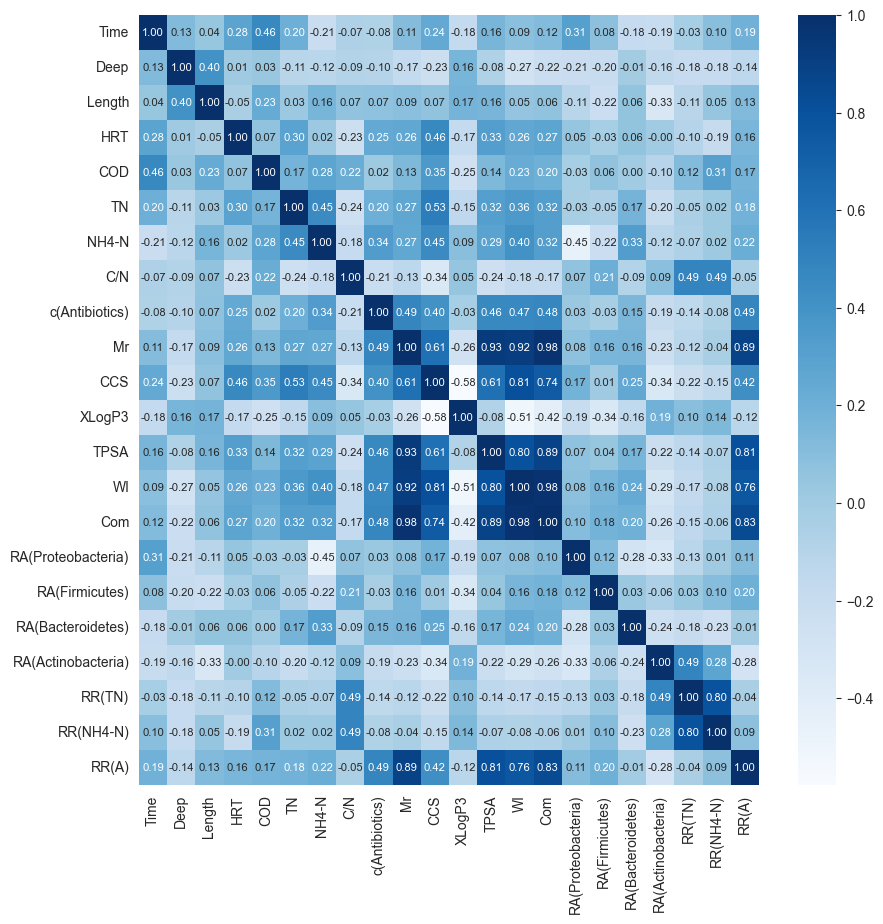

In [6]:
# plotting Pearson correlation heatmap
import seaborn as sb
fig, ax = plt.subplots(figsize=(10,10))  

ax = sb.heatmap(df.corr(), cmap="Blues", annot=True,fmt=".2f", annot_kws={"size": 8})
 
# displaying heatmap
plt.show()

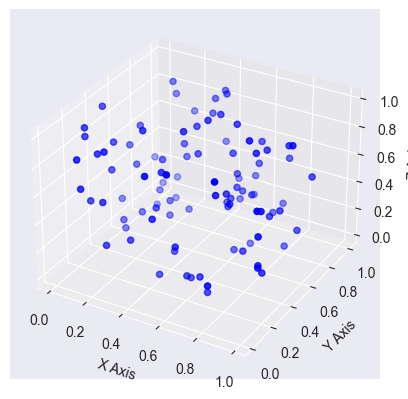

In [7]:
import numpy as np  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  
  
# 生成随机数据  
np.random.seed(0)  # 设置随机种子以获得可重复的结果  
x = np.random.rand(100)  # 第一维数据  
y = np.random.rand(100)  # 第二维数据  
z = np.random.rand(100)  # 第三维数据  
  
# 创建三维图形  
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')  
  
# 绘制三维散点图  
ax.scatter(x, y, z, c='blue', marker='o')  
  
# 设置坐标轴标签  
ax.set_xlabel('X Axis')  
ax.set_ylabel('Y Axis')  
ax.set_zlabel('Z Axis')  
  
# 显示图形  
plt.show()